In [22]:
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics

In [23]:
class kmeans():
    def __init__(self, data=None, n_site=4, dim=2, max_iter=5000, tol=1e-4, distance_method=None, dtype=np.int8, select_choice=True) -> None:
        self.n_site = n_site
        self.dim = dim
        self.max_iter = max_iter
        self.tol = tol
        if data:
            if type(data) == list:

                self.data = np.array(data, dtype=dtype)
                if select_choice:
                    lines = np.random.choice(
                        range(self.data.shape[0]), self.n_site, replace=False)
                    self.sites = self.data[lines]  # 随机选择n_site个点为初始站点
                else:
                    self.init_sites()
            self.dim = len(data[0])
        self.distance_method = distance_method

    def init_sites(self):
        np.random.randint(0, 5, (self.n_site, self.dim), dtype=np.float32)

    def distance(self):
        if self.distance_method:
            return self.distance_method(self)
        return np.array([np.sqrt(np.sum(np.square(self.data - i), axis=1))
                         for i in self.sites])

    def get_groups(self):
        r = self.distance()
        # print(r)
        self.min_distances = r.min(axis=0)
        self.min_indexs = r.argmin(axis=0)
        self.groups = [[] for i in range(self.n_site)]
        for index, i in enumerate(self.data):
            self.groups[self.min_indexs[index]].append(
                [index, self.min_distances[index]])

    def update_sites(self):
        for index, i in enumerate(self.groups):
            items = self.data[[j[0] for j in i]]
            # print(items)
            self.sites[index] = np.mean(items, axis=0)
            # print(np.mean(items, axis=0))

    def forward(self):  # 执行运算
        for i in range(self.max_iter):
            self.get_groups()
            self.update_sites()

    def group_data(self):  # 获取分组后的数据
        r = []
        for i in self.groups:
            r.append(self.data[[j[0] for j in i]])
        return r

    def SC(self):  # 获取所有点轮廓值
        # group_data = self.group_data()
        a = metrics.silhouette_samples(self.data, self.min_indexs)
        return a

    def show(self):
        r = self.group_data()
        colors = [
            'black',
            'blue',
            'yellow',
            'pink',
        ]
        p = plt.subplot(projection='3d')
        for index, g in enumerate(r):
            x = [i[0] for i in g]
            y = [i[1] for i in g]
            z = [i[2] for i in g]
            p.scatter(x, y, z, c=np.random.rand(len(x),3), s=5, marker='o')
        x = [i[0] for i in self.sites]
        y = [i[1] for i in self.sites]
        z = [i[2] for i in self.sites]
        p.scatter(x, y, z, c='black', s=40, marker=10)
        p.set(xlabel='x', ylabel='y', zlabel='z')
        # p.viewLim()
        plt.show()

In [24]:
weight_time = 1
def distance(p1,p2):
    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2*weight_time)**0.5

In [25]:
# 生成初始类聚中心
points = []
for i in range(5):
    points.append([random.randint(-50,50),random.randint(-50,50)])
# 生成居民
peoples = []
early_a= 24
later_a=0

for i in range(80):
    early = random.randint(0,25) # 最早服务时间
    if early<early_a:
        early_a=early
    long = random.randint(1,3) # 服务间隔时长
    if early+long<=24:
        if early+long>later_a:
            later_a = early+long
    else:
        if early+long-24>later_a:
            later_a = early+long-24
    
    peoples.append([random.randint(-50,50),random.randint(-50,50), [early, early+long], random.randint(0,100) > 70])
for i in peoples:
    i.insert(2,i[2][0]*(i[2][1]-i[2][0])/(later_a-early_a))# 计算时间坐标


    

groups [array([[48.        ,  6.        ,  0.33333333],
       [46.        ,  9.        ,  1.        ],
       [47.        ,  6.        ,  1.91666667],
       [31.        ,  9.        ,  1.5       ],
       [35.        , -8.        ,  0.25      ]]), array([[-49.        ,   9.        ,   1.5       ],
       [-44.        ,   9.        ,   0.16666667],
       [-39.        ,  14.        ,   0.33333333],
       [-49.        ,  -4.        ,   0.91666667]]), array([[-41.        ,  44.        ,   0.625     ],
       [-22.        ,  24.        ,   1.375     ],
       [-42.        ,  45.        ,   1.125     ],
       [-34.        ,  36.        ,   0.625     ],
       [-23.        ,  42.        ,   1.66666667],
       [-23.        ,  36.        ,   0.625     ],
       [-34.        ,  47.        ,   0.58333333],
       [-20.        ,  47.        ,   2.        ],
       [-15.        ,  45.        ,   2.75      ],
       [-30.        ,  42.        ,   1.16666667],
       [-30.        ,  44.        

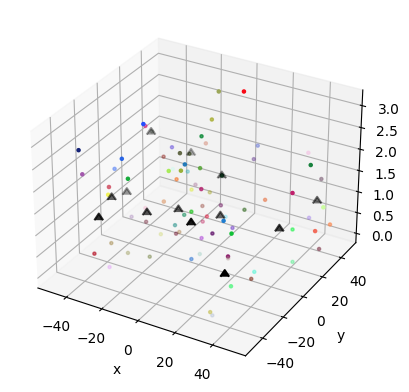

In [26]:
k = kmeans(data=[i[:3] for i in peoples], n_site=13, dim=3, dtype=np.float64)
k.forward()
groups = k.group_data()
sites = k.sites

print('groups',groups)
k.show()

In [66]:
def to(num, to_):
    r = []
    while True:
        num, y = divmod(num, to_)
        r.append(str(y))
        if num < to_:
            r.append(str(num))
            break
    return list(reversed(r))

In [67]:
to(3,2)

['1', '1']

In [47]:
bin(10)

'0b1010'